In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [84]:
#load data
def load_data(train_dir):
    arr = []
    # train_dir = 'trainingDigits'
    for f in os.listdir(train_dir):
        temp_list = []
        label = f.split('_')[0]
        temp_df = pd.read_csv(train_dir+'/'+f, header=None).astype(str)
        for line in temp_df[0].values.tolist():
            temp_list.extend(list(line))
        temp_list.extend(label)
        arr.append(temp_list)
    df = pd.DataFrame(arr)
    return df

In [85]:
#load train data
train_data = load_data('trainingDigits')
# load test data
test_data = load_data('testDigits')

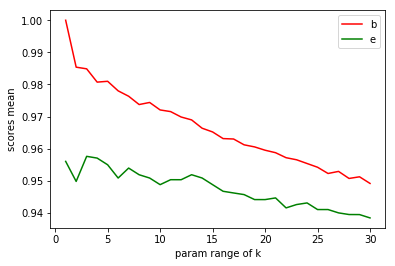

In [90]:
#select K
param_name = 'n_neighbors'
param_range = range(1, 31)
X_train = train_data.iloc[:, :1024].values
y_train = train_data[1024].tolist()
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, cv=5, param_name=param_name, param_range=param_range, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

#plot
plt.plot(param_range, train_scores_mean, color='red', label='train')
plt.plot(param_range, test_scores_mean, color='green', label='test')
plt.legend('best')
plt.xlabel('param range of k')
plt.ylabel('scores mean')
plt.show()

In [93]:
#train
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [94]:
#test
X_test = test_data.iloc[:, :1024].values
y_test = test_data[1024].tolist()
score = classifier.score(X_test, y_test)
print(score)

0.9873150105708245
